# <font color=blue>Statistical Thinking in Python (Part 1)</font> 

After all of the hard work of acquiring data and getting them into a form you can work with, you ultimately want to make clear, succinct conclusions from them. This crucial last step of a data analysis pipeline hinges on the principles of statistical inference. In this course, you will start building the foundation you need to think statistically, to speak the language of your data, to understand what they are telling you. The foundations of statistical thinking took decades upon decades to build, but they can be grasped much faster today with the help of computers. With the power of Python-based tools, you will rapidly get up to speed and begin thinking statistically by the end of this course.

## <font color=red>01 -  Graphical exploratory data analysis </font> 

 Look before you leap! A very important proverb, indeed. Prior to diving in headlong into sophisticated statistical inference techniques, you should first explore your data by plotting them and computing simple summary statistics. This process, called exploratory data analysis, is a crucial first step in statistical analysis of data. So it is a fitting subject for the first chapter of Statistical Thinking in Python. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('./data/iris.csv')
versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)'].values
setosa_petal_length = df[df['species']=='setosa']['petal length (cm)'].values
virginica_petal_length = df[df['species']=='virginica']['petal length (cm)'].values
versicolor_petal_width = df[df['species']=='versicolor']['petal width (cm)'].values
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Plotting a histogram of iris data

For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is available as part of scikit-learn. Here, you will work with his measurements of petal length.

Plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings. Recall that to specify the default seaborn style, you can use sns.set(), where sns is the alias that seaborn is imported as.

The subset of the data set containing the Iris versicolor petal lengths in units of centimeters (cm) is stored in the NumPy array versicolor_petal_length.

In the video, Justin plotted the histograms by using the pandas library and indexing the DataFrame to extract the desired column. Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for plt.show()) to the dummy variable _. This is to prevent unnecessary output from being displayed. It is not required for your solutions to these exercises, however it is good practice to use it. Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using _. Therefore, you will see it used in the solution code.

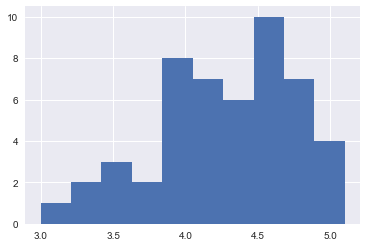

In [3]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Show histogram
plt.show();

### Axis labels!

In the last exercise, you made a nice histogram of petal lengths of Iris versicolor, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. Now, add axis labels to the plot using plt.xlabel() and plt.ylabel(). Don't forget to add units and assign both statements to _. The packages matplotlib.pyplot and seaborn are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.

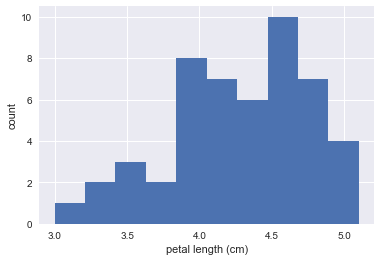

In [4]:
# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### Adjusting the number of bins in a histogram

The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist().

The plotting utilities are already imported and the seaborn defaults already set. The variable you defined in the last exercise, versicolor_petal_length, is already in your namespace.

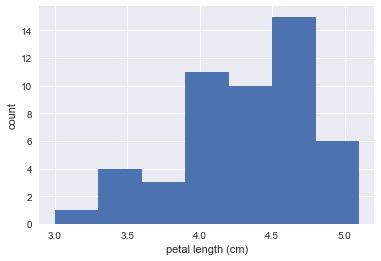

In [5]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data= len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

### Bee swarm plot


<div><div><p>Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species, and the y-axis the petal lengths. A data frame containing the data is in your namespace as <code>df</code>.</p>
<p>For your reference, the code Justin used to create the bee swarm plot in the video is provided below:</p>
<pre><code>_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
</code></pre>
<p>In the IPython Shell, you can use <code>sns.swarmplot?</code> or <code>help(sns.swarmplot)</code> for more details on how to make bee swarm plots using seaborn.</p></div></div>

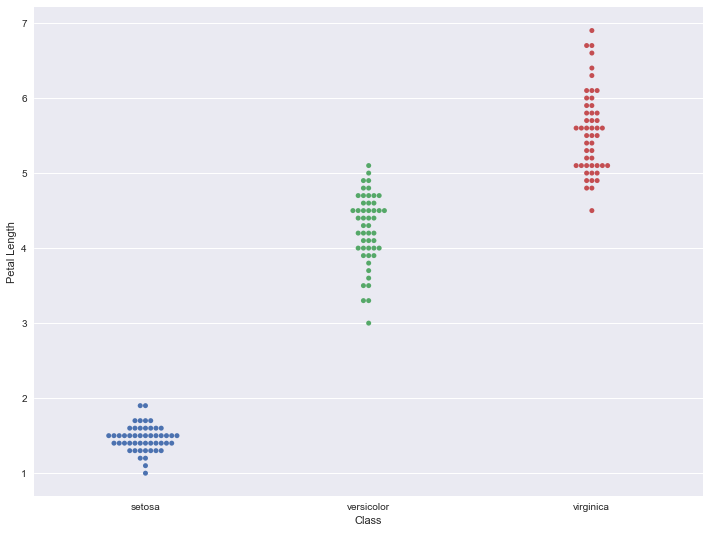

In [6]:
plt.figure(figsize=(12,9))
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('Class')
_ = plt.ylabel('Petal Length')

# Show the plot
plt.show()

### Interpreting a bee swarm plot

Which of the following conclusions could you draw from the bee swarm plot of iris petal lengths you generated in the previous exercise? For your convenience, the bee swarm plot is regenerated and shown to the right.

I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.

<img src=" 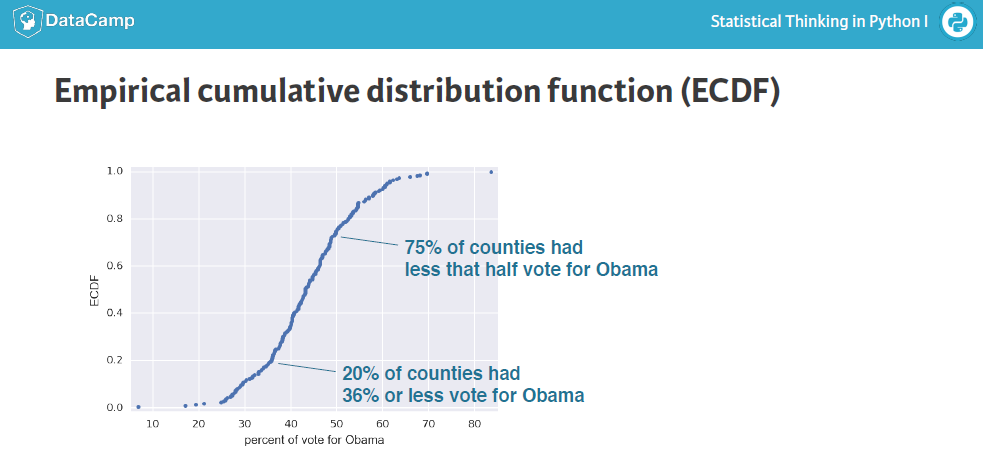" />

### Computing the ECDF

In this exercise, you will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, foo(x,y) according to the following skeleton:

    def foo(a,b):
        """State what function does here"""
        # Computation performed here
        return x, y

The function foo() above takes two arguments a and b and returns two values x and y. The function header def foo(a,b): contains the function signature foo(a,b), which consists of the function name, along with its parameters. For more on writing your own functions, see DataCamp's course Python Data Science Toolbox (Part 1) here!

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

You will now use your <code>ecdf()</code> function to compute the ECDF for the petal lengths of Anderson's <em>Iris versicolor</em> flowers. You will then plot the ECDF. Recall that your <code>ecdf()</code> function returns two arrays so you will need to unpack them. An example of such unpacking is <code>x, y = foo(data)</code>, for some function <code>foo()</code>.

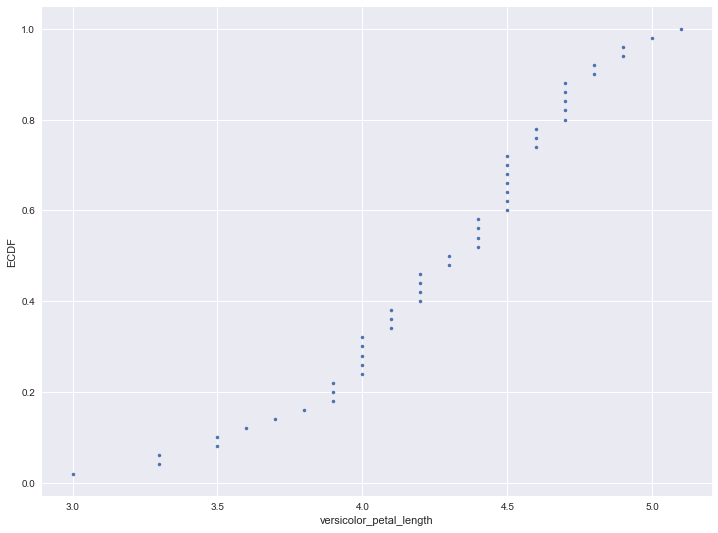

In [8]:
plt.figure(figsize=(12,9))

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('ECDF')


# Display the plot
plt.show()

### Comparison of ECDFs

<p>ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!</p>
<p>To overlay all three ECDFs on the same plot, you can use <code>plt.plot()</code> three times, once for each ECDF. Remember to include <code>marker='.'</code> and <code>linestyle='none'</code> as arguments inside <code>plt.plot()</code>.</p>

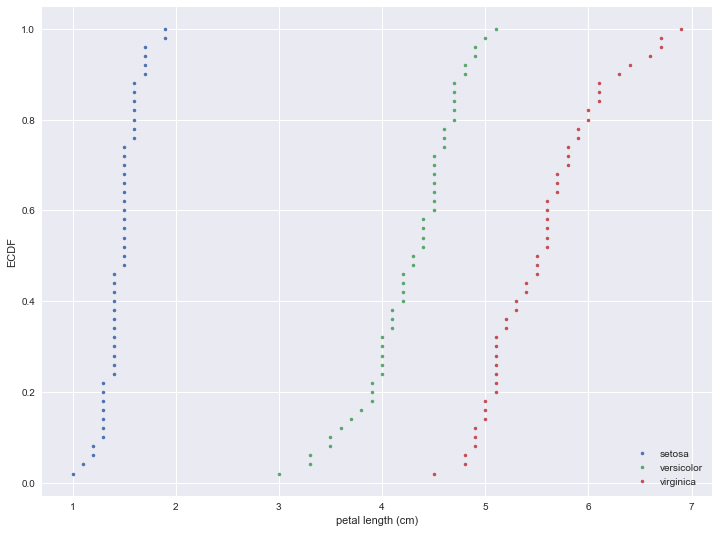

In [9]:
plt.figure(figsize=(12,9))

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

## <font color=red>02 -  Quantitative exploratory data analysis </font> 

 In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers. 

### Means and medians

Which one of the following statements is true about means and medians?

- An outlier can significantly affect the value of both the mean and the median.
- __An outlier can significantly affect the value of the mean, but not the median.__
- Means and medians are in general both robust to single outliers.
- The mean and median are equal if there is an odd number of data points.

### Computing means

The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().
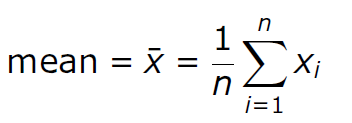

In [10]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


<img src=" 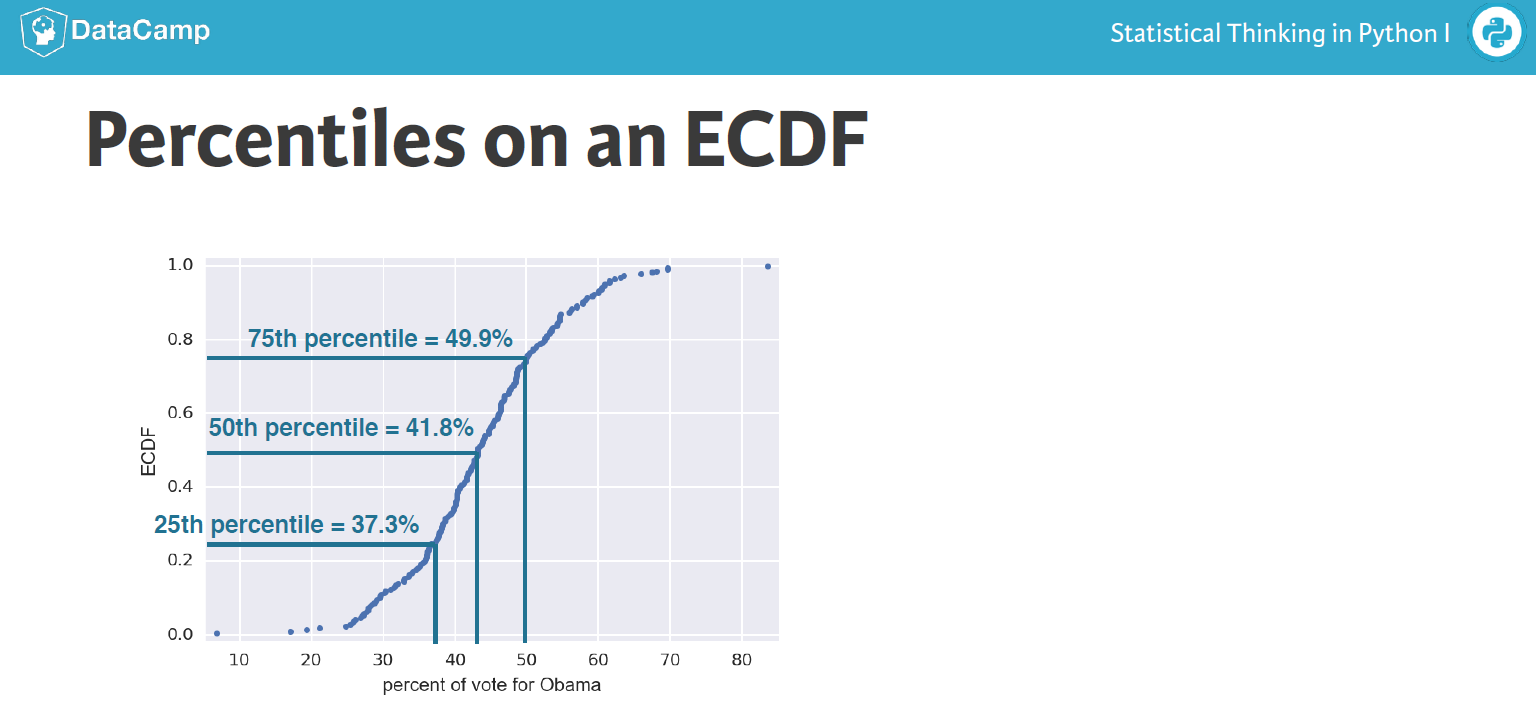" />

### Computing percentiles

In this exercise, you will compute the percentiles of petal length of Iris versicolor.

In [11]:
# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]

# Compute percentiles: ptiles_vers
ptiles_vers= np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF<br>
<div><p>To see how the percentiles relate to the ECDF, you will plot the percentiles of <em>Iris versicolor</em> petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as <code>ptiles_vers</code> and <code>percentiles</code>.</p>
<p>Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the <code>percentiles</code> array accordingly - in this case, dividing it by 100.</p></div>

In [12]:
print(ptiles_vers.tolist())

[3.3, 4.0, 4.35, 4.6, 4.9775]


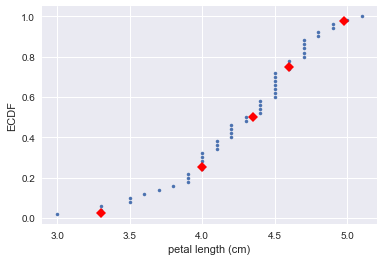

In [13]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, np.array(percentiles)/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

<img src=" 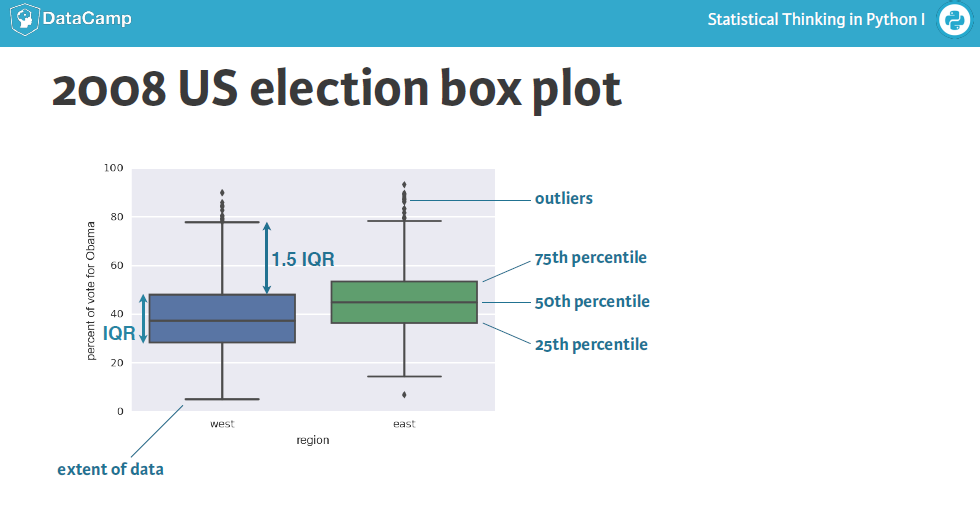" />

### Box-and-whisker plot<br>
<div><p>Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, <code>df</code>, which contains the petal length data, in your namespace. Inspect the data frame <code>df</code> in the IPython shell using <code>df.head()</code> to make sure you know what the pertinent columns are.</p>
<p>For your reference, the code used to produce the box plot in the video is provided below:</p>
<p><code>_ = sns.boxplot(x='east_west', y='dem_share', data=df_all_states)</code></p>
<p><code>_ = plt.xlabel('region')</code></p>
<p><code>_ = plt.ylabel('percent of vote for Obama')</code></p>
<p>In the IPython Shell, you can use <code>sns.boxplot?</code> or <code>help(sns.boxplot)</code> for more details on how to make box plots using seaborn.</p></div>

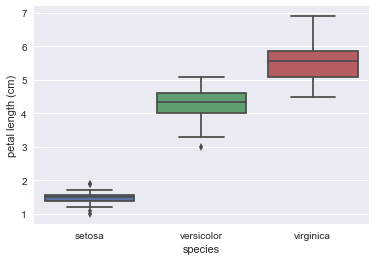

In [14]:
#plt.figure(figsize=(12,9));
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')

# Show the plot
plt.show();

<img src=" 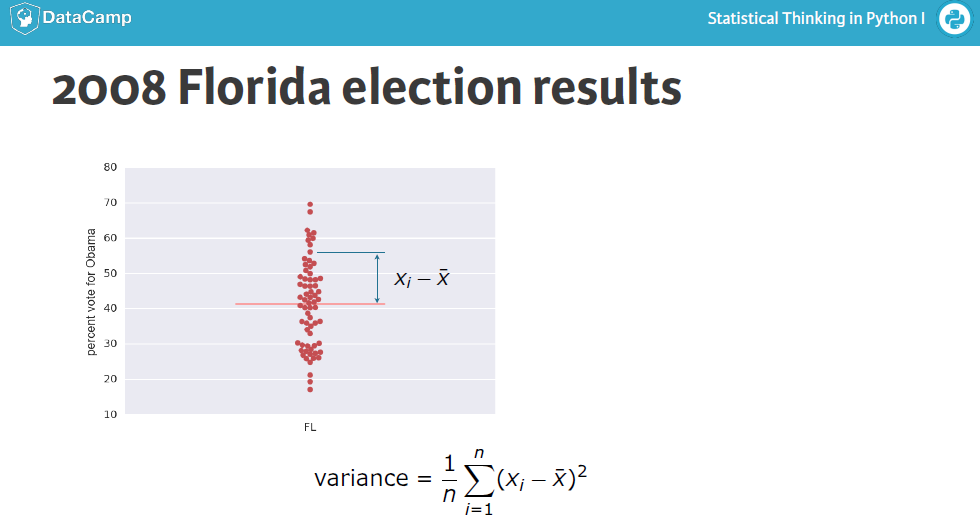" />

### Computing the variance

<div><p>It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of <em>Iris veriscolor</em> using the equations discussed in the videos. We will then use <code>np.var()</code> to compute it.</p></div>

In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


<img src=" 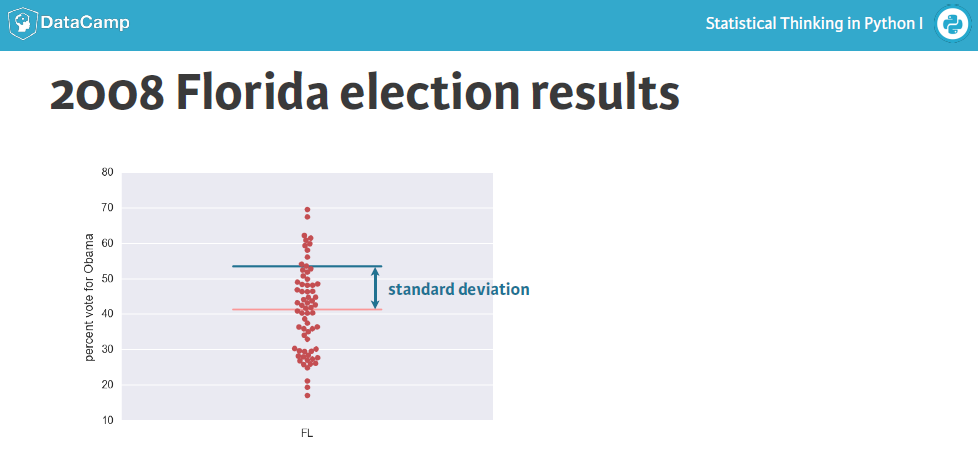" />

### The standard deviation and the variance

<div><p>As mentioned in the video, the standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using <code>np.std()</code> and comparing it to what you get by computing the variance with <code>np.var()</code> and then computing the square root.</p></div>

In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


<img src=" 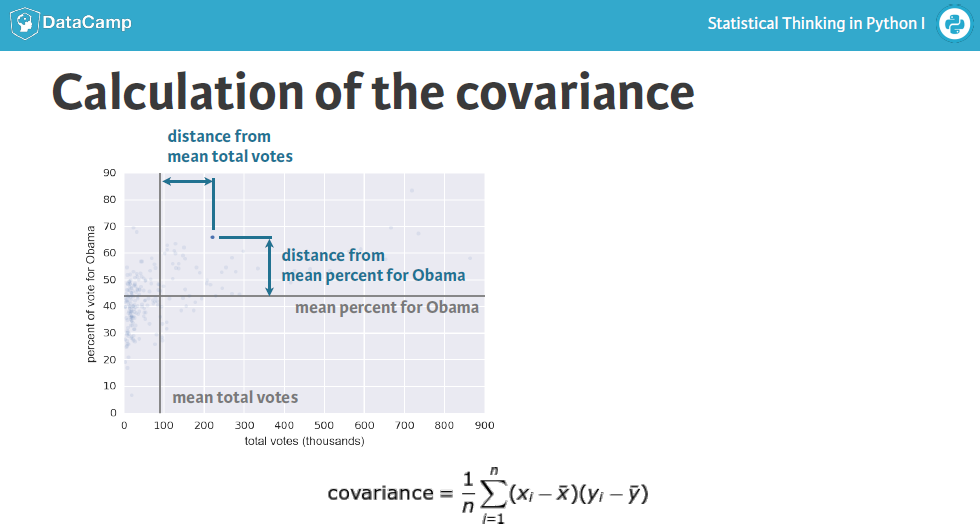" />

<img src=" 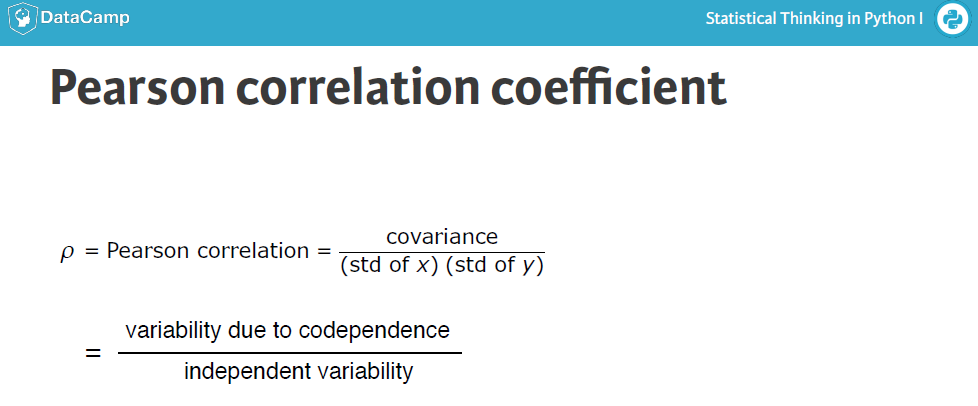" />

### Scatter plots

<p>When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a <strong>scatter plot</strong> of the petal length and width measurements of Anderson's <em>Iris versicolor</em> flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.</p>
<p>For your reference, the code used to produce the scatter plot in the video is provided below:</p>
<p><code>_ = plt.plot(total_votes/1000, dem_share, marker='.', linestyle='none')</code></p>
<p><code>_ = plt.xlabel('total votes (thousands)')</code></p>
<p><code>_ = plt.ylabel('percent of vote for Obama')</code></p>

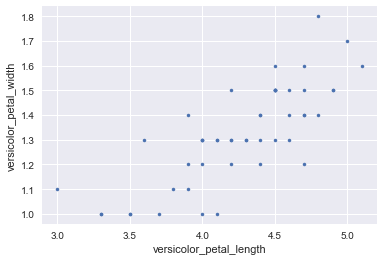

In [17]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle='none')

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

### Variance and covariance by looking

Consider four scatter plots of x-y data, appearing to the right. Which has, respectively,

- the highest variance in the variable x
- the highest covariance,
- negative covariance?

<img src=" 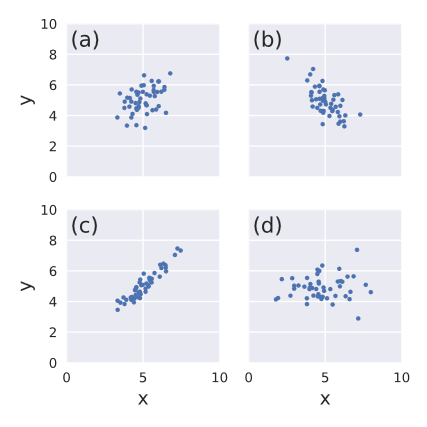" />
d, c, b

### Computing the covariance

<div><p>The covariance may be computed using the Numpy function <code>np.cov()</code>. For example, we have two sets of data <code>x</code> and <code>y</code>, <code>np.cov(x, y)</code> returns a 2D array where entries <code>[0,1]</code> and <code>[1,0]</code> are the covariances. Entry <code>[0,0]</code> is the variance of the data in <code>x</code>, and entry <code>[1,1]</code> is the variance of the data in <code>y</code>. This 2D output array is called the <strong>covariance matrix</strong>, since it organizes the self- and covariance.</p>
<p>To remind you how the <em>I. versicolor</em> petal length and width are related, we include the scatter plot you generated in a previous exercise.</p></div>

In [18]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix=np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('\n')
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]


0.07310204081632653


### Computing the Pearson correlation coefficient

<div><p>As mentioned in the video, the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the <code>np.corrcoef()</code> function. Like <code>np.cov()</code>, it takes two arrays as arguments and returns a 2D array. Entries <code>[0,0]</code> and <code>[1,1]</code> are necessarily equal to <code>1</code> (can you think about why?), and the value we are after is entry <code>[0,1]</code>.</p>
<p>In this exercise, you will write a function, <code>pearson_r(x, y)</code> that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of <em>I. versicolor</em>.</p>
<p>Again, we include the scatter plot you generated in a previous exercise to remind you how the petal width and length are related.</p></div>

## <font color=red>03 -  Thinking probabilistically-- Discrete variables</font> 

 Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. In this chapter, you will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically. 

In [19]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


### What is the goal of statistical inference?

Why do we do statistical inference?


- To draw probabilistic conclusions about what we might expect if we collected the same data again.
- To draw actionable conclusions from data.
- To draw more general conclusions from relatively few data or observations.
- __All of these.__

### Why do we use the language of probability?

Which of the following is not a reason why we use probabilistic language in statistical inference?

- Probability provides a measure of uncertainty.
- __Probabilistic language is not very precise.__
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

<img src=" 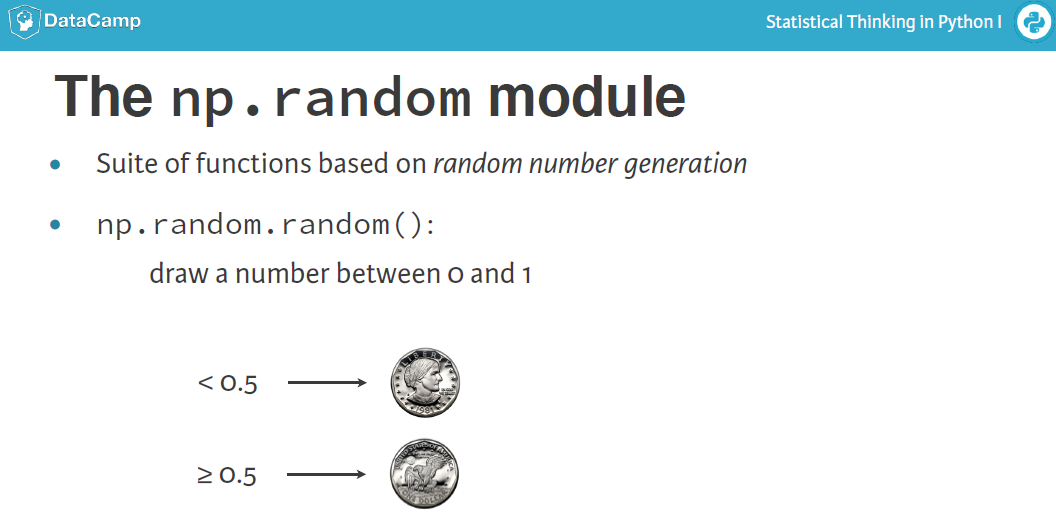" />

### Generating random numbers using the np.random module

<p>We will be hammering the <code>np.random</code> module for the rest of this course and its sequel. Actually, you will probably call functions from this module more than any other while wearing your hacker statistician hat. Let's start by taking its simplest function, <code>np.random.random()</code> for a test spin. The function returns a random number between zero and one. Call <code>np.random.random()</code> a few times in the IPython shell. You should see numbers jumping around between zero and one.</p>
<p>In this exercise, we'll generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.</p>
<p>You may have noticed that, in the video, Justin generated 4 random numbers by passing the keyword argument <code>size=4</code> to <code>np.random.random()</code>. Such an approach is more efficient than a <code>for</code> loop: in this exercise, however, you will write a <code>for</code> loop to experience hacker statistics as the practice of repeating an experiment over and over again.</p>

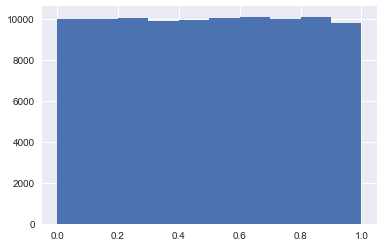

In [20]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

<img src=" 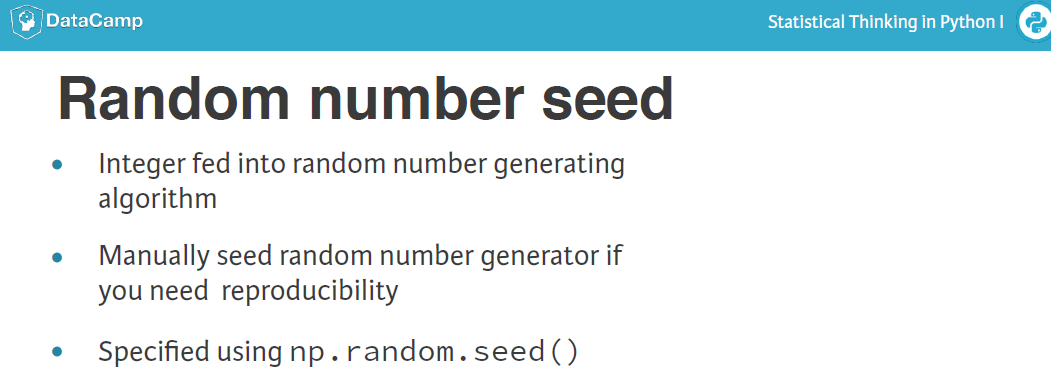" />

### The np.random module and Bernoulli trials

<p>You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 0.59em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.48em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="mi" id="MathJax-Span-3" style="font-family: MathJax_Math; font-style: italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 0.869em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-1">p</script> of landing heads (success) and probability <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mn>1</mn><mo>&amp;#x2212;</mo><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-4" style="width: 2.62em; display: inline-block;"><span style="display: inline-block; position: relative; width: 2.244em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.524em, 1002.24em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-5"><span class="mn" id="MathJax-Span-6" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-7" style="font-family: MathJax_Main; padding-left: 0.222em;">−</span><span class="mi" id="MathJax-Span-8" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 1.131em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mn>1</mn><mo>−</mo><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-2">1-p</script> of landing tails (failure). In this exercise, you will write a function to perform <code>n</code> Bernoulli trials, <code>perform_bernoulli_trials(n, p)</code>, which returns the number of successes out of <code>n</code> Bernoulli trials, each of which has probability <code>p</code> of success. To perform each Bernoulli trial, use the <code>np.random.random()</code> function, which returns a random number between zero and one.</p>

In [21]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success

### How many defaults might we expect?

<p>Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is <code>p = 0.05</code>. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the <code>perform_bernoulli_trials()</code> function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to <code>True</code>, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.</p>

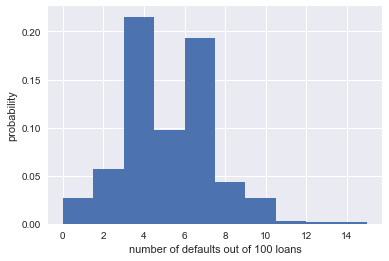

In [22]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

<img src=" 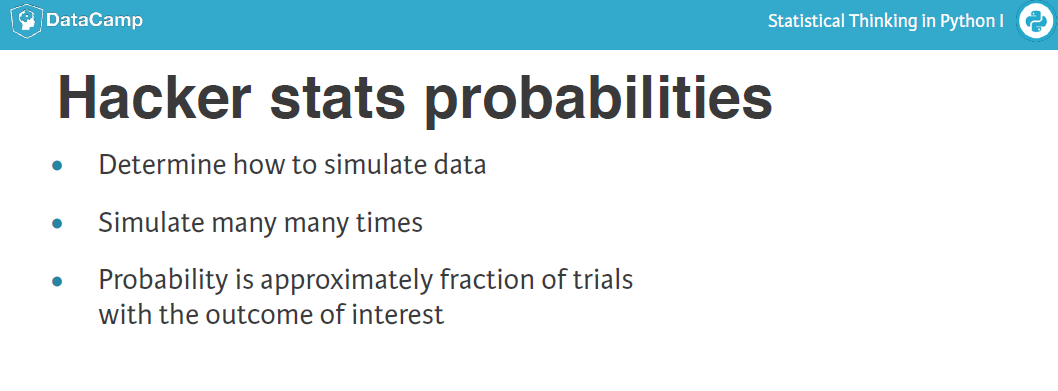" />

### Will the bank fail?

<p>Plot the number of defaults you got from the previous exercise, in your namespace as <code>n_defaults</code>, as a CDF. The <code>ecdf()</code> function you wrote in the first chapter is available.</p>
<p>If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?</p>

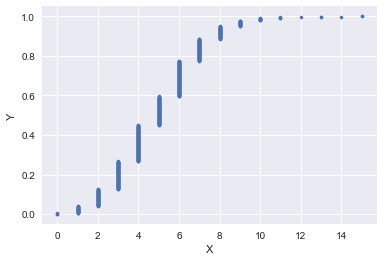

Probability of losing money = 0.022


In [23]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('X')
_ = plt.ylabel('Y')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### Sampling out of the Binomial distribution

<p>Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using <code>np.random.binomial()</code>. This is identical to the calculation you did in the last set of exercises using your custom-written <code>perform_bernoulli_trials()</code> function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.</p>
<p><em>Note</em>: For this exercise and all going forward, the random number generator is pre-seeded for you (with <code>np.random.seed(42)</code>) to save you typing that each time.</p>

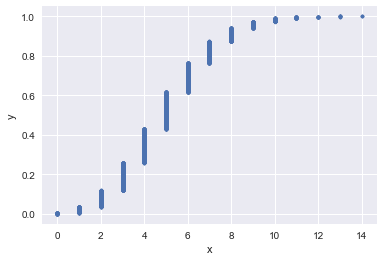

In [24]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100,0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker='.', linestyle = 'none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

# Show the plot
plt.show()

### Plotting the Binomial PMF

<p>As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to <code>plt.hist()</code> via the <code>bins</code> keyword argument. We want the bins centered on the integers. So, the edges of the bins should be <code>-0.5, 0.5, 1.5, 2.5, ...</code> up to <code>max(n_defaults) + 1.5</code>. You can generate an array like this using <code>np.arange()</code> and then subtracting <code>0.5</code> from the array.</p>
<p>You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array <code>n_defaults</code>.</p>

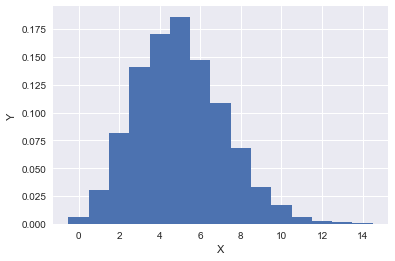

In [25]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, density=True, bins=bins)

# Label axes
_ = plt.xlabel('X')
_ = plt.ylabel('Y')

# Show the plot
plt.show()

<img src=" 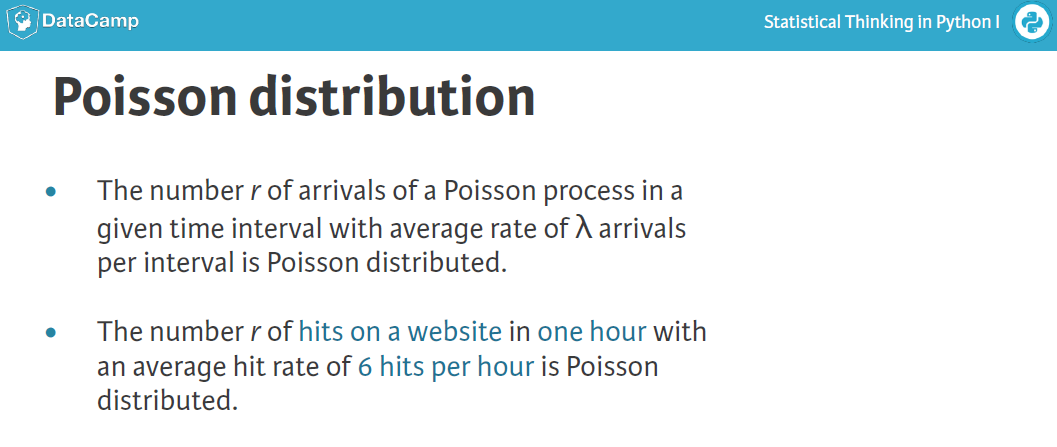" />

### Relationship between Binomial and Poisson distributions

<p>You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-9" style="width: 1.338em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.122em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1001.12em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-10"><span class="mi" id="MathJax-Span-11" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mi" id="MathJax-Span-12" style="font-family: MathJax_Math; font-style: italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 0.869em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-3">np</script> approximates a Binomial distribution for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-13" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.588em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.57em, 2.522em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-14"><span class="mi" id="MathJax-Span-15" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.075em; border-left: 0px solid; width: 0px; height: 0.655em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-4">n</script> Bernoulli trials with probability <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-16" style="width: 0.59em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.48em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-17"><span class="mi" id="MathJax-Span-18" style="font-family: MathJax_Math; font-style: italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 0.869em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-5">p</script> of success (with <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-6-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-19" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.588em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.57em, 2.522em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-20"><span class="mi" id="MathJax-Span-21" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.075em; border-left: 0px solid; width: 0px; height: 0.655em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-6">n</script> large and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-22" style="width: 0.59em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.48em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-23"><span class="mi" id="MathJax-Span-24" style="font-family: MathJax_Math; font-style: italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 0.869em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-7">p</script> small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.</p>
<p>Let's explore these two distributions computationally. You will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, you will compute the mean and standard deviation of samples from a Binomial distribution with parameters <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-25" style="width: 0.697em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.588em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.57em, 2.522em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-26"><span class="mi" id="MathJax-Span-27" style="font-family: MathJax_Math; font-style: italic;">n</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.075em; border-left: 0px solid; width: 0px; height: 0.655em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi></math></span></span><script type="math/tex" id="MathJax-Element-8">n</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>p</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-28" style="width: 0.59em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.481em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1000.48em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-29"><span class="mi" id="MathJax-Span-30" style="font-family: MathJax_Math; font-style: italic;">p</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 0.869em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>p</mi></math></span></span><script type="math/tex" id="MathJax-Element-9">p</script> such that <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>n</mi><mi>p</mi><mo>=</mo><mn>10</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-31" style="width: 4.009em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.419em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.524em, 1003.38em, 2.705em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-32"><span class="mi" id="MathJax-Span-33" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mi" id="MathJax-Span-34" style="font-family: MathJax_Math; font-style: italic;">p</span><span class="mo" id="MathJax-Span-35" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mn" id="MathJax-Span-36" style="font-family: MathJax_Main; padding-left: 0.278em;">10</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.289em; border-left: 0px solid; width: 0px; height: 1.131em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>n</mi><mi>p</mi><mo>=</mo><mn>10</mn></math></span></span><script type="math/tex" id="MathJax-Element-10">np = 10</script>.</p>

In [26]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000] 
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      10.0145 3.1713545607516043
n = 20 Binom: 10.0592 2.23523944131272
n = 100 Binom: 10.0441 2.9942536949964675
n = 1000 Binom: 10.0129 3.139639085946026


### How many no-hitters in a season?

<p>In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. The ECDF of the number of no-hitters in a season is shown to the right. Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?</p>
<p><em>Note</em>: The no-hitter data set was scraped and calculated from the data sets available at <a href="http://www.retrosheet.org" target="_blank">retrosheet.org</a> (<a href="http://www.retrosheet.org/notice.txt" target="_blank">license</a>).</p>

<img src=" 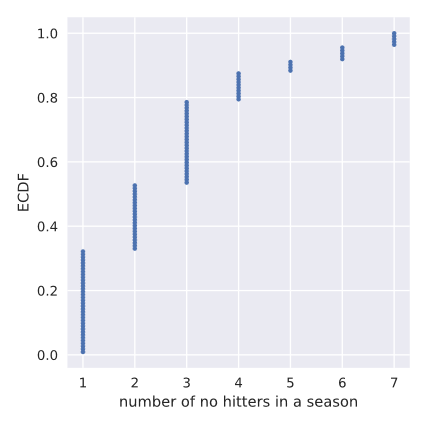" />

- Discrete uniform
- Binomial
- Poisson
- __Both Binomial and Poisson, though Poisson is easier to model and compute.__
- Both Binomial and Poisson, though Binomial is easier to model and compute.

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

### Was 2015 anomalous?

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [27]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0072


## <font color=red>04 -  Thinking probabilistically-- Continuous variables </font> 

 In the last chapter, you learned about probability distributions of discrete variables. Now it is time to move on to continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this last chapter of the course, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course. 

<img src=" 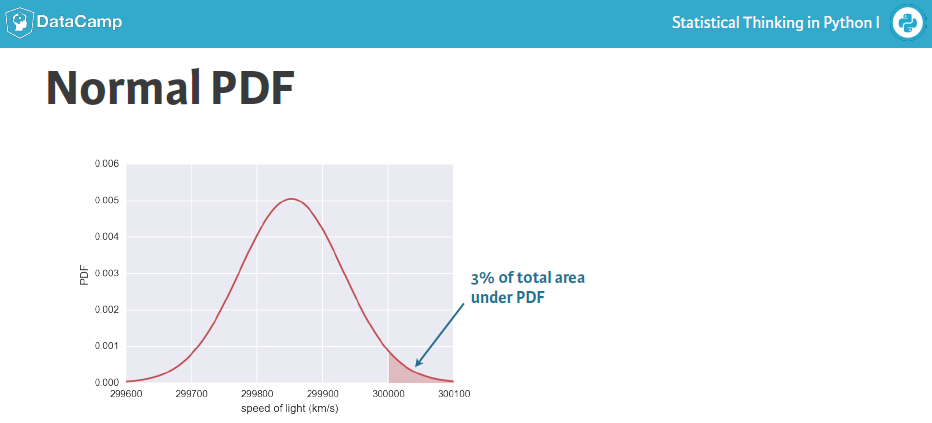" />

<img src=" 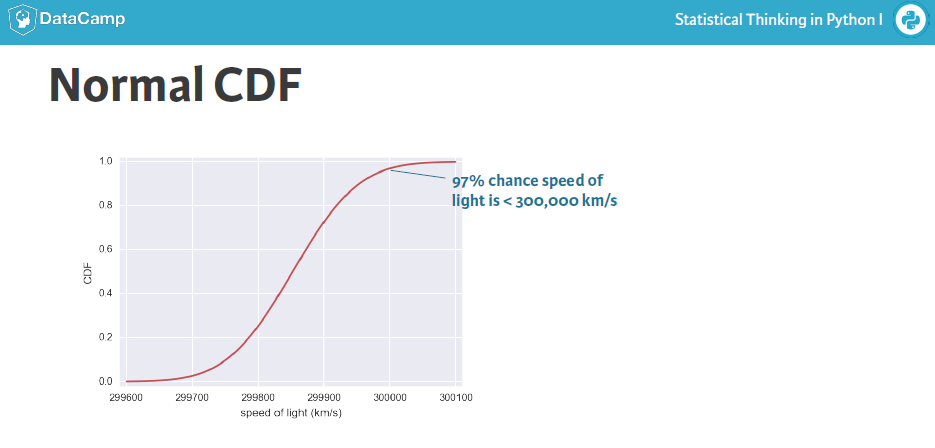" />

### Interpreting PDFs

Consider the PDF shown to the right. Which of the following is true?

<img src=" 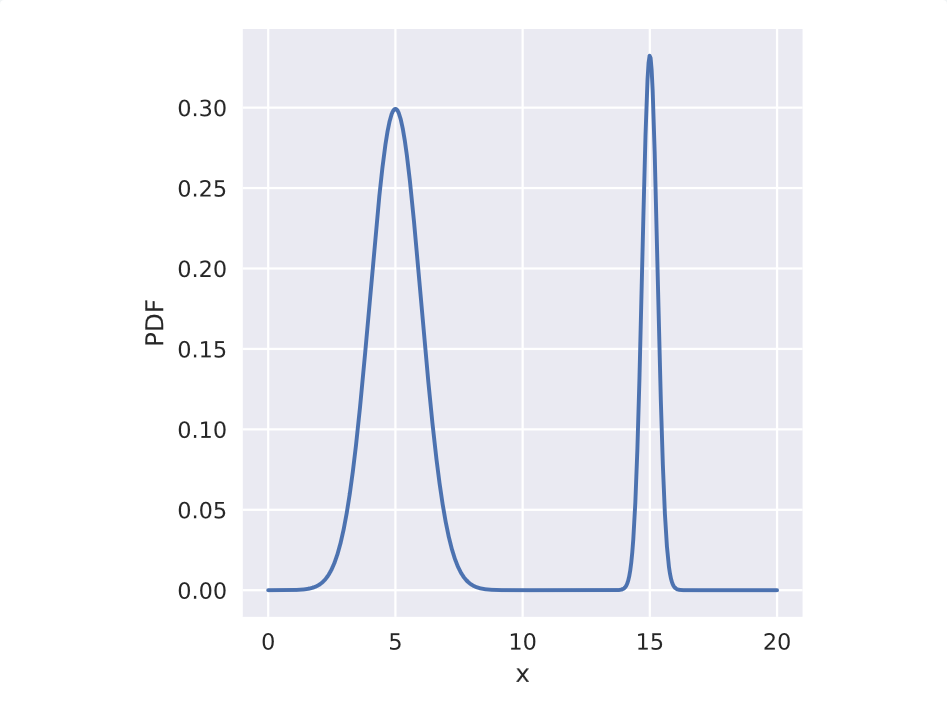" width="400"/>

- __x is more likely than not less than 10.__
- x is more likely than not greater than 10.
- We cannot tell from the PDF if x is more likely to be greater than or less than 10.
- This is not a valid PDF because it has two peaks.

### Interpreting CDFs

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x
is greater than 10?<img src=" 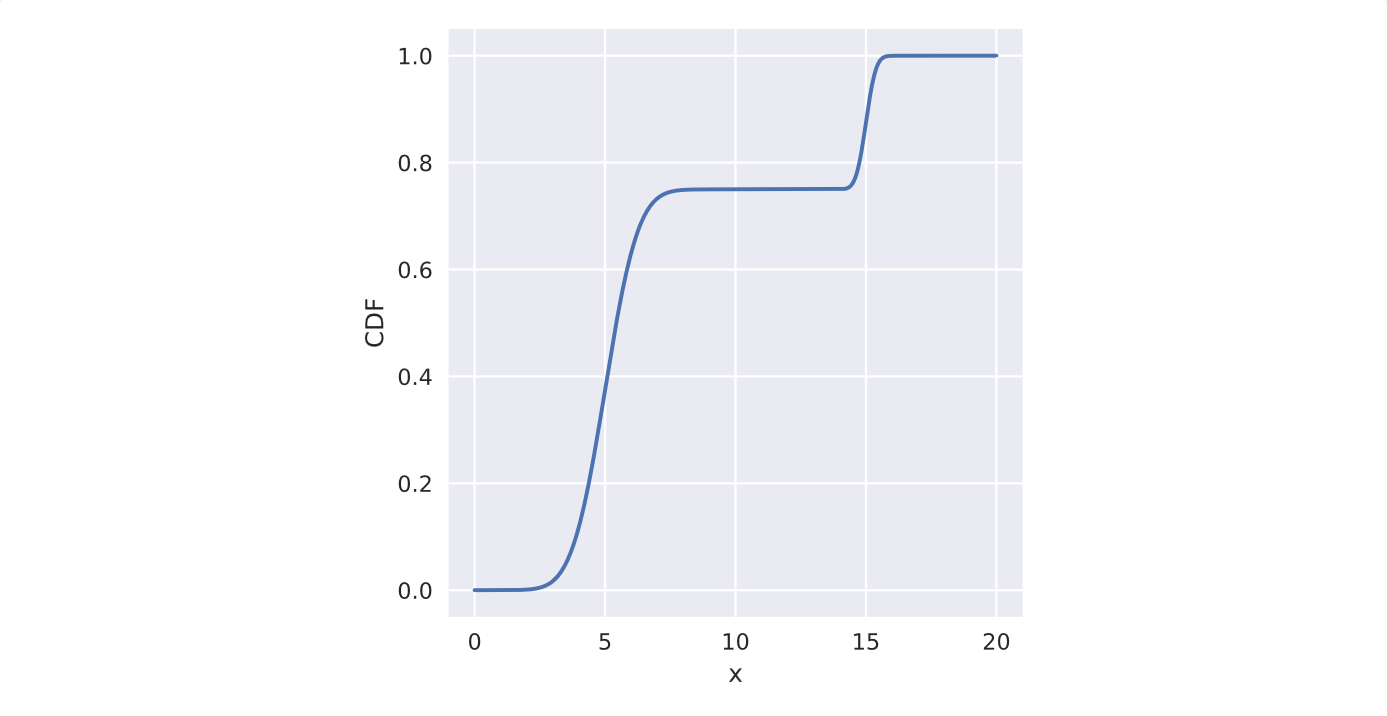" width="400"/>

**0.25**

### Interpreting CDFs

At right is the CDF corresponding to the PDF you considered in the last exercise. Using the CDF, what is the probability that x is greater than 10?

<img src=" 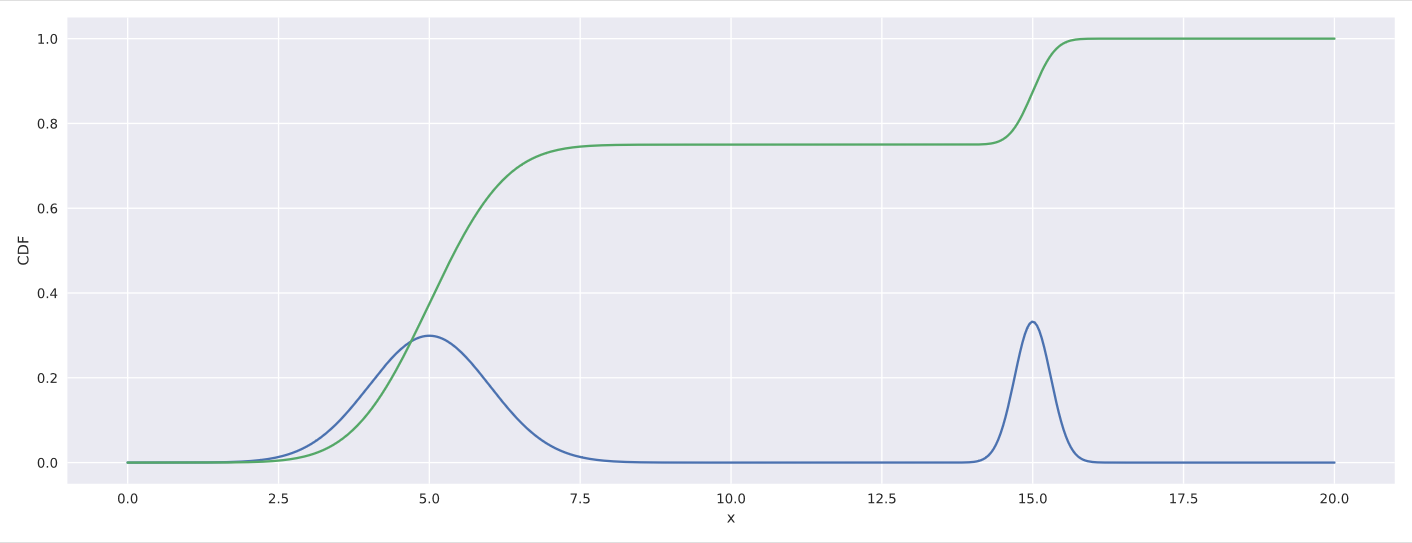" width="600"/>

**0,25**

<img src=" 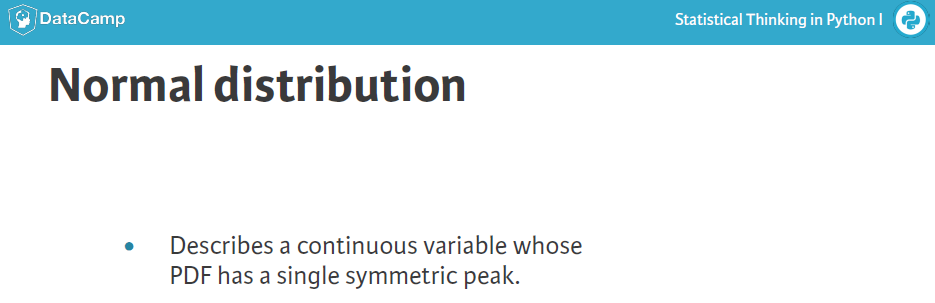" width="600"/>

<img src=" 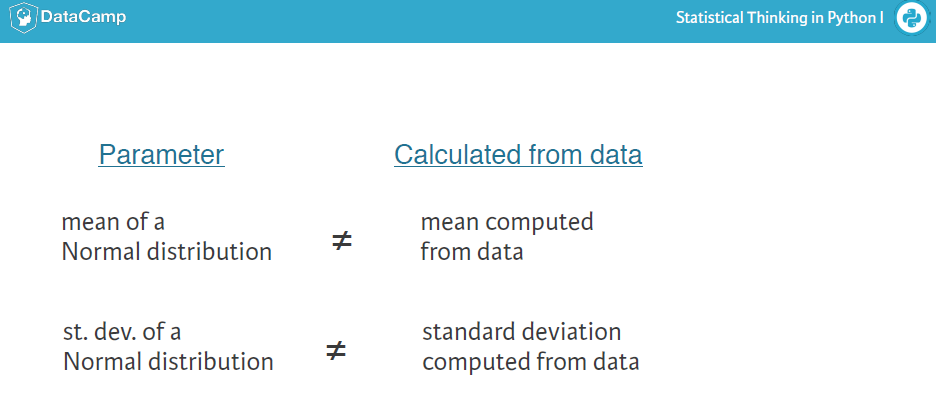" width="600"/>

### The Normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

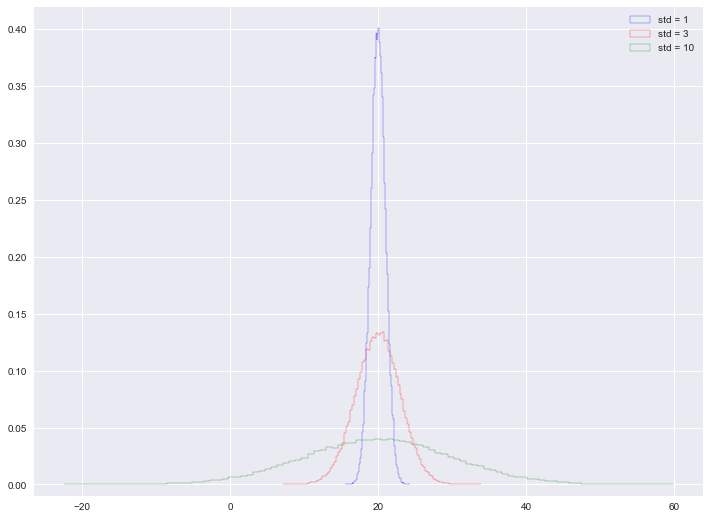

In [28]:
# Draw 100000 samples from Normal distribution with stds of interest: 
# samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

plt.figure(figsize=(12,9))
# Make histograms
plt.hist(samples_std1, density=True, histtype='step', bins=100, color='blue')
plt.hist(samples_std3, density=True, histtype='step', bins=100, color='red')
plt.hist(samples_std10, density=True, histtype='step', bins=100, color='green')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

### The Normal CDF



<div><p>Now that you have a feel for how the Normal PDF looks, let's consider its CDF. Using the samples you generated in the last exercise (in your namespace as <code>samples_std1</code>, <code>samples_std3</code>, and <code>samples_std10</code>), generate and plot the CDFs.</p></div>

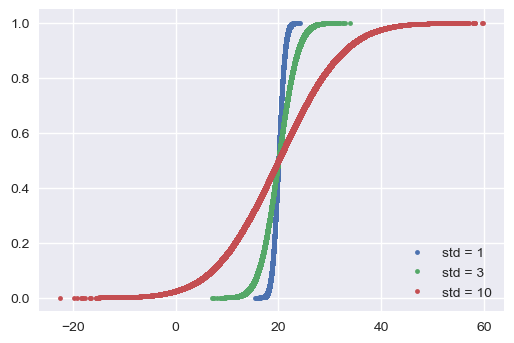

In [29]:
plt.figure(dpi=100)
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_= plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_= plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_= plt.plot(x_std10, y_std10, marker='.', linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Are the Belmont Stakes results Normally distributed?

<div><p>Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. <a href="https://en.wikipedia.org/wiki/Secretariat_(horse)" target="_blank">Secretariat</a> ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the <code>np.random.normal()</code> function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?</p>
<p><em>Note</em>: Justin scraped the data concerning the Belmont Stakes from the <a href="https://en.wikipedia.org/wiki/Belmont_Stakes" target="_blank">Belmont Wikipedia page</a>.</p></div>

In [30]:
belmont_no_outliers = pd.read_csv('./data/belmont_no_outliers.csv', index_col=0)['0'].values.tolist()

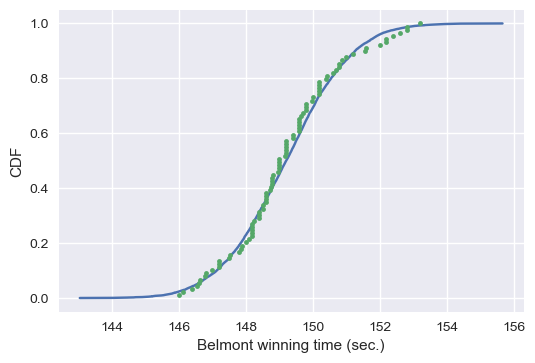

In [31]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
plt.figure(dpi=100)
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

### What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [32]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = sum (samples<=144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000599


### Matching a story and a distribution

How might we expect the time between Major League no-hitters to be distributed? Be careful here: a few exercises ago, we considered the probability distribution for the number of no-hitters in a season. Now, we are looking at the probability distribution of the time between no hitters.

Normal
**Exponential**
Poisson
Uniform

<img src=" 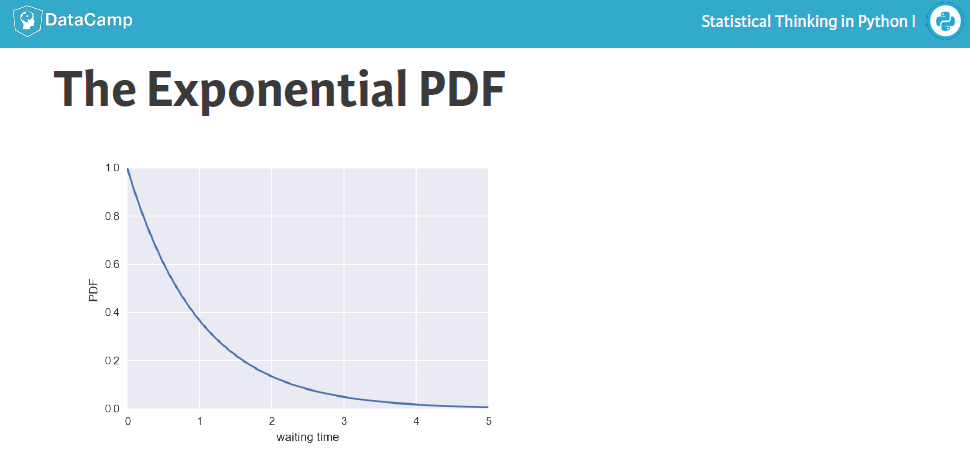" width="800"/>

### Waiting for the next Secretariat

Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? 

- Normal, because the distribution of Belmont winning times are Normally distributed.
- Normal, because there is a most-expected waiting time, so there should be a single peak to the distribution.
- Exponential: It is very unlikely for a horse to be faster than Secretariat, so the distribution should decay away to zero for high waiting time.
- __Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.__

### If you have a story, you can simulate it!

Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [33]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

### Distribution of no-hitters and cycles

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

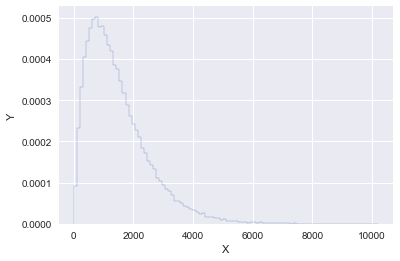

In [34]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000 )

# Make the histogram
_ = plt.hist(waiting_times, bins=100, density=True, histtype='step')

# Label axes
_= plt.xlabel ('X')
_= plt.ylabel ('Y')

# Show the plot
plt.show()